# Master Python Notebook_Magnum-API_Data Analysis and Visualization

In [3]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [4]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress
import os
import gmaps
from config import gkey
import requests
import json
gmaps.configure(api_key=gkey)

## Zipcode National and State Hospital Distance

In [5]:
US_df = pd.read_csv("CSVs/Full_ZH_Info.csv")

In [6]:
State_groups = US_df.groupby("State")

# Look at Poverty Rate
State_mean_pov = pd.DataFrame(State_groups["Pvty Rate"].mean())
State_mean_pov = State_mean_pov.reset_index(drop=False)
State_mean_pov = State_mean_pov.loc[State_mean_pov["State"]!="PR",:]
State_mean_pov = State_mean_pov.sort_values("Pvty Rate", ascending=False)
State_mean_pov = State_mean_pov.set_index("State")
State_mean_pov.head()

,Pvty Rate
State,
MS,23.210144
KY,22.450296
NM,21.500670
WV,20.211340
AL,20.092490


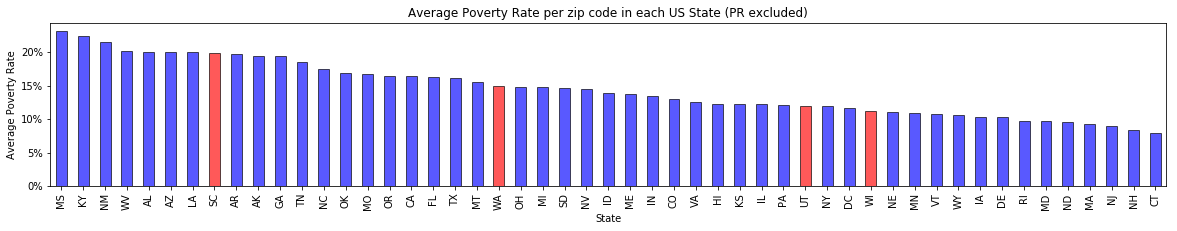

In [7]:
my_colors = "bbbbbbbrbbbbbbbbbbbbrbbbbbbbbbbbbbrbbrbbbbbbbbbbbb"
State = State_mean_pov.plot(kind="bar", figsize=(20,3), alpha=0.65, edgecolor="black", color=my_colors, legend=False)
State.set_title("Average Poverty Rate per zip code in each US State (PR excluded)")
State.set_ylabel("Average Poverty Rate")
vals = State.get_yticks()
vals = [val/100 for val in vals]
State.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig("Images/StatePovRate.png")

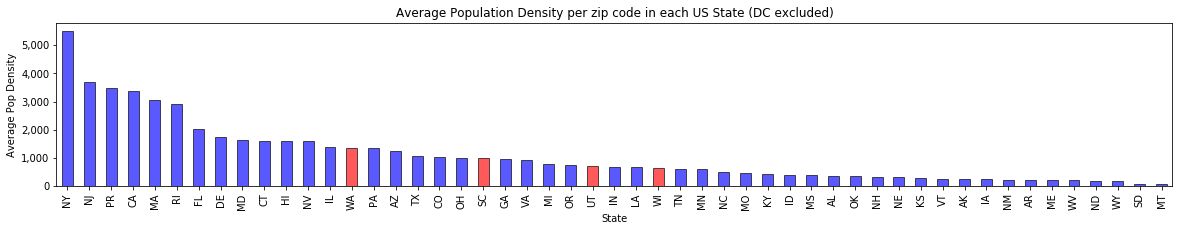

In [8]:
# Look at Population Density
State_mean_pd = pd.DataFrame(State_groups["Pop Density"].mean())
State_mean_pd = State_mean_pd.reset_index(drop=False)
State_mean_pd = State_mean_pd.loc[State_mean_pd["State"]!="DC",:]
State_mean_pd = State_mean_pd.sort_values("Pop Density", ascending=False)
State_mean_pd = State_mean_pd.set_index("State")
State_mean_pd.head()

my_colors = "bbbbbbbbbbbbbrbbbbbrbbbbrbbrbbbbbbbbbbbbbbbbbbbbbbb"
State_pd = State_mean_pd.plot(kind="bar", figsize=(20,3), alpha=0.65, edgecolor="black", color=my_colors, legend=False)
State_pd.set_title("Average Population Density per zip code in each US State (DC excluded)")
State_pd.set_ylabel("Average Pop Density")
vals = State_pd.get_yticks()
State_pd.set_yticklabels(['{:,.0f}'.format(x) for x in vals])
plt.savefig("Images/StatePopDens.png")

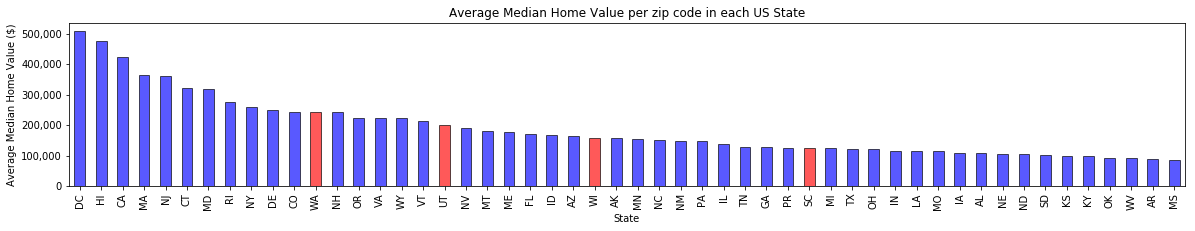

In [9]:
# Med Home Value
State_mean_hv = pd.DataFrame(State_groups["Med Home_Val"].mean())
State_mean_hv = State_mean_hv.reset_index(drop=False)
State_mean_hv = State_mean_hv.sort_values("Med Home_Val", ascending=False)
State_mean_hv = State_mean_hv.set_index("State")
State_mean_hv.head()

my_colors = "bbbbbbbbbbbrbbbbbrbbbbbbrbbbbbbbbbrbbbbbbbbbbbbbbbbb"
State_hv = State_mean_hv.plot(kind="bar", figsize=(20,3), alpha=0.65, edgecolor="black", color=my_colors, legend=False)
State_hv.set_title("Average Median Home Value per zip code in each US State")
State_hv.set_ylabel("Average Median Home Value ($)")
vals = State_hv.get_yticks()
State_hv.set_yticklabels(['{:,.0f}'.format(x) for x in vals])
plt.savefig("Images/StateHomeVal.png")

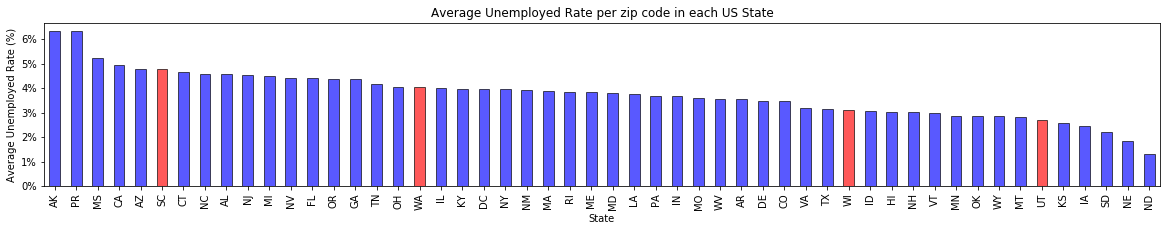

In [10]:
# Unemployment Rate
State_mean_ur = pd.DataFrame(State_groups["Unemployed Rate"].mean())
State_mean_ur = State_mean_ur.reset_index(drop=False)
State_mean_ur = State_mean_ur.sort_values("Unemployed Rate", ascending=False)
State_mean_ur = State_mean_ur.set_index("State")
State_mean_ur.head()

my_colors = "bbbbbrbbbbbbbbbbbrbbbbbbbbbbbbbbbbbbbrbbbbbbbbrbbbbb"
State_ur= State_mean_ur.plot(kind="bar", figsize=(20,3), alpha=0.65, edgecolor="black", color=my_colors, legend=False)
State_ur.set_title("Average Unemployed Rate per zip code in each US State")
State_ur.set_ylabel("Average Unemployed Rate (%)")
vals = State_ur.get_yticks()
vals = [val/100 for val in vals]
State_ur.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig("Images/StateUnempRate.png")

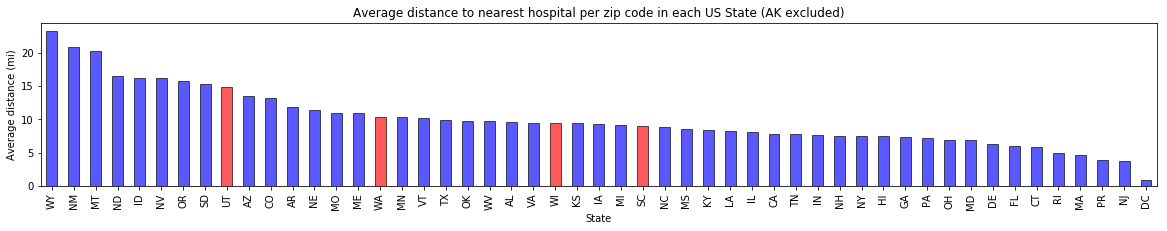

In [11]:
# Distance to Hospital
State_mean_dh = pd.DataFrame(State_groups["Hosp_Dist"].mean())
State_mean_dh = State_mean_dh.reset_index(drop=False)
State_mean_dh = State_mean_dh.loc[State_mean_dh["State"]!="AK",:]
State_mean_dh = State_mean_dh.sort_values("Hosp_Dist", ascending=False)
State_mean_dh = State_mean_dh.set_index("State")

my_colors = "bbbbbbbbrbbbbbbrbbbbbbbrbbbrbbbbbbbbbbbbbbbbbbbbbbb"
State_dh= State_mean_dh.plot(kind="bar", figsize=(20,3), alpha=0.65, edgecolor="black", color=my_colors, legend=False)
State_dh.set_title("Average distance to nearest hospital per zip code in each US State (AK excluded)")
State_dh.set_ylabel("Average distance (mi)")
plt.savefig("Images/StateNearHosp.png")

In [12]:
# Wisconsin Data
WI_data = US_df.loc[US_df["State"]=="WI",:]
print(len(WI_data))
WI_data_2 = WI_data.groupby("Urban Type")
WI_data_2 = pd.DataFrame(WI_data_2["Pvty Rate"].mean())
WI_data_2

774


,Pvty Rate
Urban Type,
Mixed,8.722218
Rural,11.424619
Urban Cluster,8.975274
Urbanized Area,13.234961


In [13]:
# SC Data
SC_data = US_df.loc[US_df["State"]=="SC",:]
print(len(SC_data))
SC_data_2 = SC_data.groupby("Urban Type")
SC_data_2 = pd.DataFrame(SC_data_2["Pvty Rate"].mean())
SC_data_2

424


,Pvty Rate
Urban Type,
Mixed,20.397356
Rural,21.656917
Urban Cluster,11.051934
Urbanized Area,16.850130


In [14]:
# WA Data
WA_data = US_df.loc[US_df["State"]=="WA",:]
print(len(WA_data))
WA_data_2 = WA_data.groupby("Urban Type")
WA_data_2 = pd.DataFrame(WA_data_2["Pvty Rate"].mean())
WA_data_2

598


,Pvty Rate
Urban Type,
Mixed,13.894956
Rural,16.595190
Urban Cluster,17.313873
Urbanized Area,12.899211


In [15]:
# UT Data
UT_data = US_df.loc[US_df["State"]=="UT",:]
print(len(UT_data))
UT_data_2 = UT_data.groupby("Urban Type")
UT_data_2 = pd.DataFrame(UT_data_2["Pvty Rate"].mean())
UT_data_2

288


,Pvty Rate
Urban Type,
Mixed,10.886405
Rural,12.010415
Urban Cluster,14.333074
Urbanized Area,11.649244


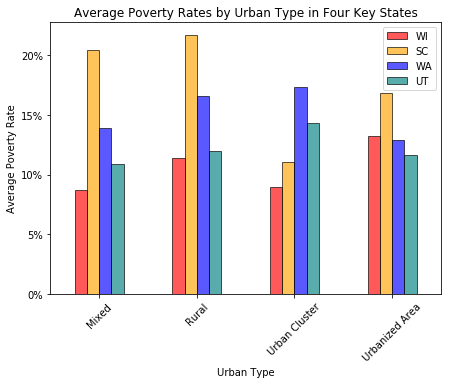

In [16]:
# Average Poverty Rates by Urban Type Across Four States
Merge_1 = pd.merge(WI_data_2, SC_data_2, left_index=True, right_index=True, suffixes=["_WI", "_SC"])
Merge_2 = pd.merge(Merge_1, WA_data_2, left_index=True, right_index=True)
Merge_3 = pd.merge(Merge_2, UT_data_2, left_index=True, right_index=True)
#del Merge_3.index.name
Pov_Rate_Urb_Type = Merge_3.rename(columns={"Pvty Rate_WI": "WI", "Pvty Rate_SC":"SC","Pvty Rate_x": "WA", "Pvty Rate_y": "UT"})
Pov_Rate_Urb_Type

my_colors=["red", "orange", "blue", "teal"]
Pov_Rates = Pov_Rate_Urb_Type.plot(kind="bar", figsize=(7,5), alpha=0.65, edgecolor="black", color=my_colors, rot=45)
Pov_Rates.legend(loc="best")
Pov_Rates
Pov_Rates.set_title("Average Poverty Rates by Urban Type in Four Key States")
Pov_Rates.set_ylabel("Average Poverty Rate")
vals = Pov_Rates.get_yticks()
vals = [val/100 for val in vals]
Pov_Rates.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig("Images/PovRateKeyStates.png")

In [17]:
# Wisconsin

Quick_regress_WI = WI_data.loc[(WI_data["Pov_Group"] != "No_Pop") & (np.isnan(WI_data["Household Income"]) == False),:]
(slope, intercept, r_val, p_val, stderr) = linregress(Quick_regress_WI["Household Income"], Quick_regress_WI["Hosp_Dist"])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_val*r_val}, P_val: {p_val}, Std Err: {stderr}')
reg_fit = slope * Quick_regress_WI["Household Income"] + intercept

Slope: -0.00010065493160702395, Intercept: 14.914390407722042, R-squared: 0.04937556862121219, P_val: 6.046367212467691e-10, Std Err: 1.605223647996877e-05


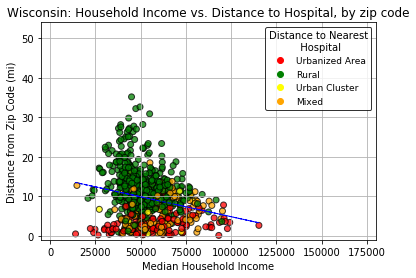

In [18]:
color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
y = [color_dict[area] for area in WI_data["Urban Type"]]
plt.scatter(WI_data["Household Income"], WI_data["Hosp_Dist"], alpha=0.75, edgecolors="black", facecolor=y)
plt.xlabel("Median Household Income")
plt.ylabel("Distance from Zip Code (mi)")
plt.title("Wisconsin: Household Income vs. Distance to Hospital, by zip code")
plt.ylim(-1,54)
plt.xlim(-5000,180000)
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")
plt.plot(Quick_regress_WI["Household Income"], reg_fit, 'b--', linewidth=1)
plt.savefig("Images/WI_incVdist")

In [19]:
# South Carolina

Quick_regress_SC = SC_data.loc[(SC_data["Pov_Group"] != "No_Pop") & (np.isnan(SC_data["Household Income"]) == False),:]
(slope, intercept, r_val, p_val, stderr) = linregress(Quick_regress_SC["Household Income"], Quick_regress_SC["Hosp_Dist"])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_val*r_val}, P_val: {p_val}, Std Err: {stderr}')
reg_fit = slope * Quick_regress_SC["Household Income"] + intercept

Slope: -7.123798825087203e-05, Intercept: 12.11525662470351, R-squared: 0.03583663721038077, P_val: 0.000145184334631913, Std Err: 1.8568453776156115e-05


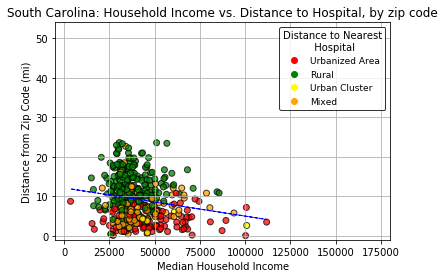

In [20]:
color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
y = [color_dict[area] for area in SC_data["Urban Type"]]
plt.scatter(SC_data["Household Income"], SC_data["Hosp_Dist"], alpha=0.75, edgecolors="black", facecolor=y)
plt.xlabel("Median Household Income")
plt.ylabel("Distance from Zip Code (mi)")
plt.title("South Carolina: Household Income vs. Distance to Hospital, by zip code")
plt.ylim(-1,54)
plt.xlim(-5000,180000)
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")
plt.plot(Quick_regress_SC["Household Income"], reg_fit, 'b--', linewidth=1)
plt.savefig("Images/SC_incVdist")

In [21]:
# WASHINGTON STATE

Quick_regress_WA = WA_data.loc[(WA_data["Pov_Group"] != "No_Pop") & (np.isnan(WA_data["Household Income"]) == False),:]
(slope, intercept, r_val, p_val, stderr) = linregress(Quick_regress_WA["Household Income"], Quick_regress_WA["Hosp_Dist"])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_val*r_val}, P_val: {p_val}, Std Err: {stderr}')
reg_fit = slope * Quick_regress_WA["Household Income"] + intercept

Slope: -0.00014472639641502786, Intercept: 18.56253821114677, R-squared: 0.10740689714525704, P_val: 2.4510008442607644e-15, Std Err: 1.7757788856239465e-05


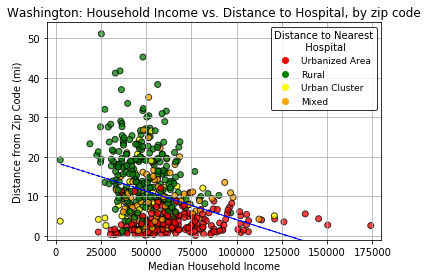

In [22]:
color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
y = [color_dict[area] for area in WA_data["Urban Type"]]
plt.scatter(WA_data["Household Income"], WA_data["Hosp_Dist"], alpha=0.75, edgecolors="black", facecolor=y)
plt.xlabel("Median Household Income")
plt.ylabel("Distance from Zip Code (mi)")
plt.title("Washington: Household Income vs. Distance to Hospital, by zip code")
plt.ylim(-1,54)
plt.xlim(-5000,180000)
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")
plt.plot(Quick_regress_WA["Household Income"], reg_fit, 'b--', linewidth=1)
plt.savefig("Images/WA_incVdist")

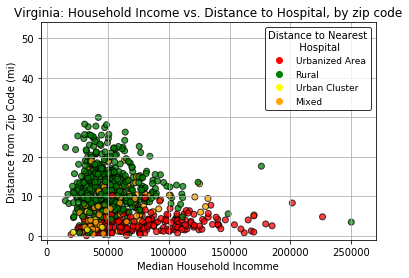

In [23]:
# Virginia -- Just for fun

VA_data = US_df.loc[US_df["State"]=="VA",:]
color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
y = [color_dict[area] for area in VA_data["Urban Type"]]
plt.scatter(VA_data["Household Income"], VA_data["Hosp_Dist"], alpha=0.75, edgecolors="black", facecolor=y)
plt.xlabel("Median Household Incomme")
plt.ylabel("Distance from Zip Code (mi)")
plt.title("Virginia: Household Income vs. Distance to Hospital, by zip code")
plt.ylim(-1,54)
plt.xlim(-5000,270000)
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")

In [29]:
# UTAH

Quick_regress_UT = UT_data.loc[(UT_data["Pov_Group"] != "No_Pop") & (np.isnan(UT_data["Household Income"]) == False),:]
(slope, intercept, r_val_ut, p_val_ut, stderr_ut) = linregress(Quick_regress_UT["Household Income"], Quick_regress_UT["Hosp_Dist"])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_val_ut*r_val_ut}, P_val: {p_val_ut}, Std Err: {stderr_ut}')
reg_fit = slope * Quick_regress_UT["Household Income"] + intercept

Slope: -0.00024639049175814216, Intercept: 28.94285544787379, R-squared: 0.11161811384424415, P_val: 1.9518614387193984e-08, Std Err: 4.25403267491295e-05


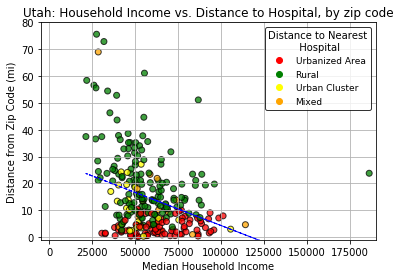

In [30]:
color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
y = [color_dict[area] for area in UT_data["Urban Type"]]
plt.scatter(UT_data["Household Income"], UT_data["Hosp_Dist"], alpha=0.75, edgecolors="black", facecolor=y, label="Rural")
plt.xlabel("Median Household Income")
plt.ylabel("Distance from Zip Code (mi)")
plt.title("Utah: Household Income vs. Distance to Hospital, by zip code")
plt.ylim(-1,80)
plt.xlim(-5000,190000)
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")
plt.plot(Quick_regress_UT["Household Income"], reg_fit, 'b--', linewidth=1)
plt.savefig("Images/UT_incVdist")

In [31]:
# US African American Neighborhoods

color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
US_use = US_df.loc[US_df["Urban Type"] != "Urban Honolulu, HI ", :]
US_use = US_use.loc[(US_use["Pov_Group"] != "No_Pop") & (np.isnan(US_use["Household Income"]) == False),:]
US_use_small = US_use.loc[(US_use["ZC Eth"]=="Black"),:]
#US_use_small = US_use_small.loc[(US_use["Hosp_Dist"] <= 10) & (US_use["Hosp_Dist"] >= 0), :]
US_use_small = US_use_small.reset_index(drop=True)

Quick_regress_df = US_use_small #.loc[US_use_small["Urban Type"]=="Rural",:]
(slope_yvc, intercept_yvc, r_val, p_val, stderr) = linregress(Quick_regress_df["Household Income"], Quick_regress_df["Hosp_Dist"])
print(f'Slope: {slope_yvc}, Intercept: {intercept_yvc}, R-squared: {r_val*r_val}, P_val: {p_val}, Std Err: {stderr}')
reg_fit = slope_yvc * Quick_regress_df["Household Income"] + intercept_yvc

Slope: -3.5562811675686545e-05, Intercept: 6.766159672397146, R-squared: 0.009866941846591048, P_val: 0.04573918132112452, Std Err: 1.7745942213790927e-05


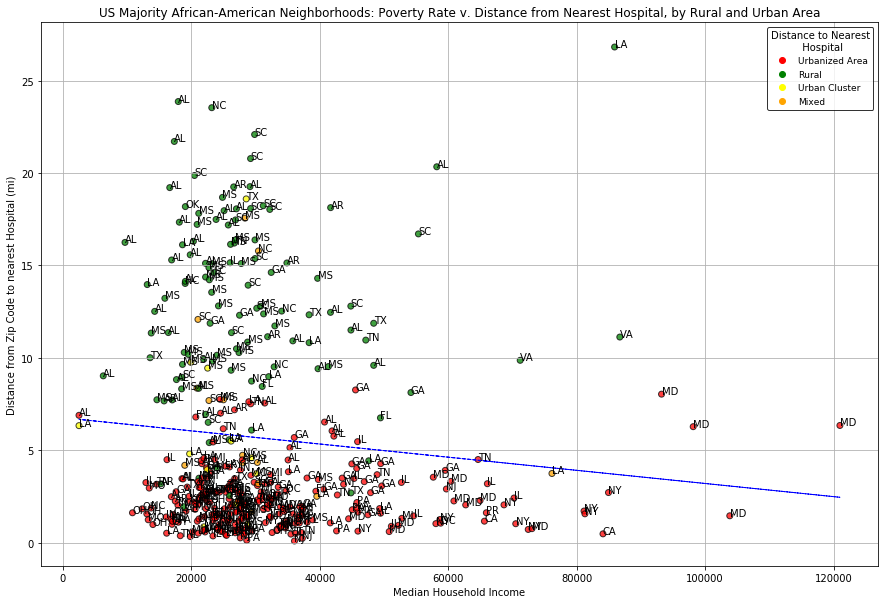

In [32]:
y = [color_dict[area] for area in US_use_small["Urban Type"]]

x_vals=US_use_small["Household Income"]
y_vals=US_use_small["Hosp_Dist"]
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x_vals, y_vals, alpha=0.75, edgecolors="black", facecolor=y)

for i in enumerate(US_use_small["State"].tolist()):
    ax.annotate(i[1], (x_vals[(i[0])],y_vals[(i[0])]))
ax.plot(Quick_regress_df["Household Income"], reg_fit, 'b--', linewidth=1)
plt.xlabel("Median Household Income")
plt.legend(title="Distance from the Nearest Hospital")
plt.ylabel("Distance from Zip Code to nearest Hospital (mi)")
plt.title("US Majority African-American Neighborhoods: Poverty Rate v. Distance from Nearest Hospital, by Rural and Urban Area")
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")
plt.savefig("Images/US_incVdist")

Slope: -5.366162248682231e-05, Intercept: 51.521882343566055, R_val: -0.10829283359014678, P_val: 0.1125106820661487, Std Err: 3.3674068139749875e-05


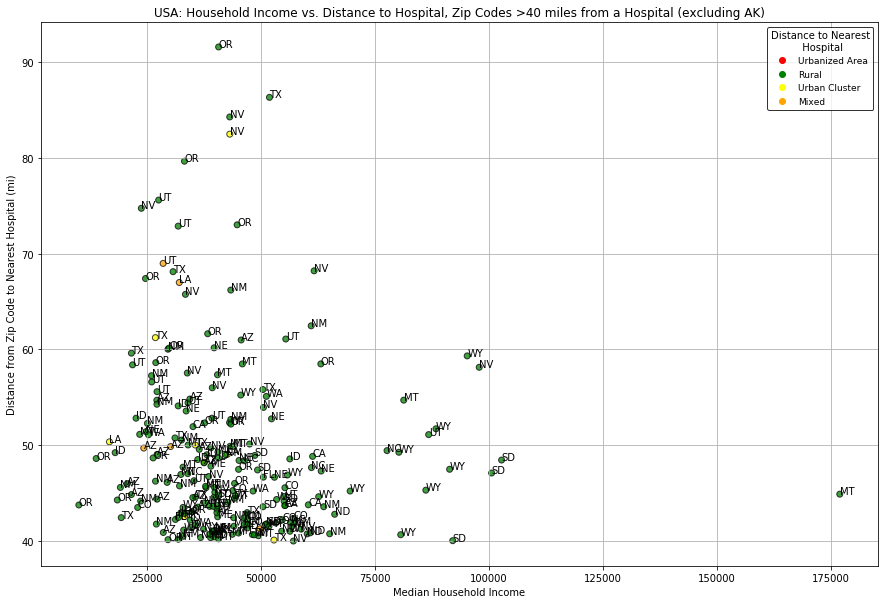

In [33]:
# US Rural Zip Codes

color_dict = {"Urbanized Area": "red", "Rural": "green", "Urban Cluster": "yellow", "Mixed": "orange"}
US_use = US_df.loc[US_df["Urban Type"] != "Urban Honolulu, HI ", :]
US_use = US_use.loc[(US_use["Pov_Group"] != "No_Pop") & (np.isnan(US_use["Household Income"]) == False),:]
US_use_small = US_use.loc[(US_use["Hosp_Dist"] >= 40) & (US_use["State"] != "AK"), :]
US_use_small = US_use_small.reset_index(drop=True)

Quick_regress_df = US_use_small
(slope_yvc, intercept_yvc, r_val, p_val, stderr) = linregress(Quick_regress_df["Household Income"], Quick_regress_df["Hosp_Dist"])
print(f'Slope: {slope_yvc}, Intercept: {intercept_yvc}, R_val: {r_val}, P_val: {p_val}, Std Err: {stderr}')

y = [color_dict[area] for area in US_use_small["Urban Type"]]

x_vals=US_use_small["Household Income"]
y_vals=US_use_small["Hosp_Dist"]
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x_vals, y_vals, alpha=0.75, edgecolors="black", facecolor=y)

for i in enumerate(US_use_small["State"].tolist()):
    ax.annotate(i[1], (x_vals[(i[0])],y_vals[(i[0])]))

plt.xlabel("Median Household Income")
plt.ylabel("Distance from Zip Code to Nearest Hospital (mi)")
plt.title("USA: Household Income vs. Distance to Hospital, Zip Codes >40 miles from a Hospital (excluding AK)")
plt.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1, fontsize=9, 
           title="Distance to Nearest\n          Hospital", frameon=1, edgecolor="black")
plt.savefig("Images/US_lngdist_incVdist")

In [34]:
# Just checking regression on African-American-dominant Zipcodes for White-dominant ones

US_use = US_df.loc[US_df["Urban Type"] != "Urban Honolulu, HI ", :]
US_use = US_use.loc[(US_use["Pov_Group"] != "No_Pop") & (np.isnan(US_use["Household Income"]) == False),:]
US_use_small = US_use.loc[(US_use["ZC Eth"]=="White"),:]
#US_use_small = US_use_small.loc[(US_use["Hosp_Dist"] <= 10) & (US_use["Hosp_Dist"] >= 0), :]
US_use_small = US_use_small.reset_index(drop=True)

Quick_regress_df = US_use_small #.loc[US_use_small["Urban Type"]=="Rural",:]
(slope_yvc, intercept_yvc, r_val, p_val, stderr) = linregress(Quick_regress_df["Household Income"], Quick_regress_df["Hosp_Dist"])
print(f'Slope: {slope_yvc}, Intercept: {intercept_yvc}, R-squared: {r_val*r_val}, P_val: {p_val}, Std Err: {stderr}')
reg_fit = slope_yvc * Quick_regress_df["Household Income"] + intercept_yvc

Slope: -7.377471143501771e-05, Intercept: 14.145252313419986, R-squared: 0.04336835836443678, P_val: 4.250894362559895e-233, Std Err: 2.2380430750929014e-06


## Visualization by Zip

In [55]:
summary_df = pd.read_csv("CSVs/byzip.csv", converters={'Provider Zip Code': lambda x: str(x)})

summary_df = summary_df.rename(columns={"Provider Zip Code": "Zipcode"})

censusdata = pd.read_csv("CSVs/Full_ZH_Info.csv", converters={'Zipcode': lambda x: str(x)})

#correct_zips = []
#for zipcode in summary_df["Zipcode"]:
#    while len(str(zipcode)) < 5:
#        zipcode = "0" + str(zipcode)
#    
#   correct_zips.append(zipcode)
#summary_df["Zipcode"] = correct_zips    
#print(len(correct_zips))

summary_df["Zipcode"] = summary_df["Zipcode"].astype(int)
censusdata["Zipcode"] = censusdata["Zipcode"].astype(int)

summary_df = summary_df.merge(censusdata, on="Zipcode")

summary_df_dropna = summary_df.dropna()

len(summary_df_dropna)
summary_df.head()

,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference,State,Urban Type,Center Point Lat,Center Point Lng,Population,...,Pvty Rate,Unemployed Rate,Pov_Group,Pov_Pct,ID,Near_Hosp,Near_Hos_Zip,Near_Hos_Lat,Near_Hos_Lng,Hosp_Dist
0,10003,72.719626,16867.592710,11566.621963,5300.970748,NY,Urbanized Area,40.731829,-73.989181,57112.0,...,8.593641,3.890601,White,70.354523,3.0,NEW YORK EYE AND EAR INFIRMARY,10003,40.731853,-73.984483,0.246590
1,10016,50.691176,20250.382426,11320.090221,8930.292206,NY,Urbanized Area,40.745221,-73.978294,50641.0,...,9.600916,3.447799,White,61.209379,2.0,NYU HOSPITALS CENTER,10016,40.742047,-73.973929,0.316923
2,10019,43.461538,17563.180096,11485.672404,6077.507692,NY,Urbanized Area,40.765823,-73.987179,38830.0,...,11.959825,3.906773,White,57.364341,2.0,THE ADDICTION INSTITUTE OF NEW YORK,10019,40.769412,-73.986808,0.248422
3,10021,108.977169,19834.264749,12282.212100,7552.052648,NY,Urbanized Area,40.769225,-73.958741,43573.0,...,6.350263,1.803869,White,87.387062,6.0,GRACIE SQUARE HOSPITAL,10021,40.769717,-73.953021,0.301969
4,10029,72.064000,19553.343280,11457.785120,8095.558160,NY,Urbanized Area,40.791763,-73.943970,79251.0,...,29.527703,5.703398,His,58.185548,1.0,METROPOLITAN HOSPITAL CENTER,10029,40.784927,-73.944530,0.472624


In [57]:
censusdata = pd.read_csv("CSVs/Full_ZH_Info.csv", converters={'Zipcode': lambda x: str(x)})

#correct_zips = []
#for zipcode in censusdata["Zipcode"]:
#    while len(str(zipcode)) < 5:
#        zipcode = "0" + str(zipcode)
#    
#    correct_zips.append(zipcode)
#    
#print(len(correct_zips))

#censusdata["Zipcode"] = correct_zips

censusdata["Zipcode"] = censusdata["Zipcode"].astype(int)
summary_df["Zipcode"] = summary_df["Zipcode"].astype(int)

summary_df = summary_df.merge(censusdata, on="Zipcode")

summary_df.head()

,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference,State_x,Urban Type_x,Center Point Lat_x,Center Point Lng_x,Population_x,...,Pvty Rate,Unemployed Rate,Pov_Group,Pov_Pct,ID,Near_Hosp,Near_Hos_Zip,Near_Hos_Lat,Near_Hos_Lng,Hosp_Dist
0,10003,72.719626,16867.592710,11566.621963,5300.970748,NY,Urbanized Area,40.731829,-73.989181,57112.0,...,8.593641,3.890601,White,70.354523,3.0,NEW YORK EYE AND EAR INFIRMARY,10003,40.731853,-73.984483,0.246590
1,10016,50.691176,20250.382426,11320.090221,8930.292206,NY,Urbanized Area,40.745221,-73.978294,50641.0,...,9.600916,3.447799,White,61.209379,2.0,NYU HOSPITALS CENTER,10016,40.742047,-73.973929,0.316923
2,10019,43.461538,17563.180096,11485.672404,6077.507692,NY,Urbanized Area,40.765823,-73.987179,38830.0,...,11.959825,3.906773,White,57.364341,2.0,THE ADDICTION INSTITUTE OF NEW YORK,10019,40.769412,-73.986808,0.248422
3,10021,108.977169,19834.264749,12282.212100,7552.052648,NY,Urbanized Area,40.769225,-73.958741,43573.0,...,6.350263,1.803869,White,87.387062,6.0,GRACIE SQUARE HOSPITAL,10021,40.769717,-73.953021,0.301969
4,10029,72.064000,19553.343280,11457.785120,8095.558160,NY,Urbanized Area,40.791763,-73.943970,79251.0,...,29.527703,5.703398,His,58.185548,1.0,METROPOLITAN HOSPITAL CENTER,10029,40.784927,-73.944530,0.472624


In [58]:
#for x in summary_df["Difference"]:

summary_df_dropna['new'] = pd.Series([8678.906667 for x in range(len(summary_df_dropna.index))])

summary_df_dropna["Weight"] = summary_df_dropna["Difference"] + summary_df_dropna["new"]
len(summary_df_dropna)

2762

In [59]:
locations = summary_df_dropna[["Center Point Lat", "Center Point Lng"]]
td = summary_df_dropna["Weight"].astype(float)

print(len(summary_df_dropna))
summary_df_dropna.to_csv("messy_summary.csv")

2762


In [60]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=td, 
                                 dissipating=False, max_intensity=47262,
                                 point_radius=.6)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

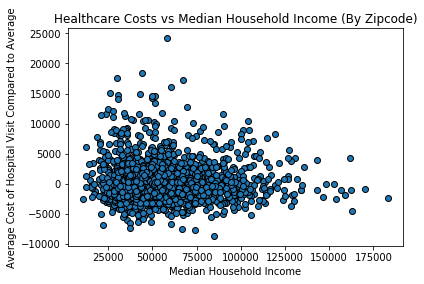

In [61]:
plt.scatter(summary_df["Household Income"], summary_df["Difference"], edgecolors="black")
plt.xlabel("Median Household Income")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Median Household Income (By Zipcode)")
plt.show
plt.savefig("Images/cost_vs_income_zips.png")

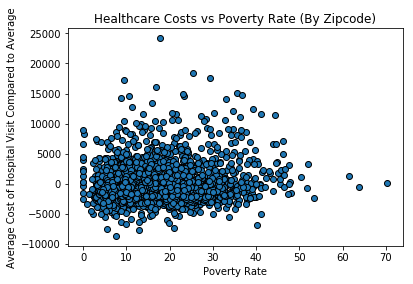

In [62]:
plt.scatter(summary_df["Pvty Rate"], summary_df["Difference"], edgecolors="black")
plt.xlabel("Poverty Rate")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Poverty Rate (By Zipcode)")
plt.show
plt.savefig("Images/cost_vs_pvty_zips.png")

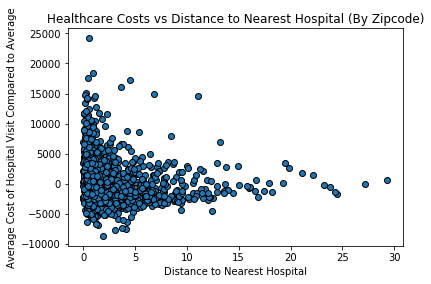

In [63]:
plt.scatter(summary_df["Hosp_Dist"], summary_df["Difference"], edgecolors="black")
plt.xlabel("Distance to Nearest Hospital")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Distance to Nearest Hospital (By Zipcode)")
plt.show
plt.savefig("Images/cost_vs_distance.png")

## Visualization by State

In [49]:
byzip = pd.read_csv("CSVs/byzip.csv")
censusdata = pd.read_csv("CSVs/Full_ZH_Info.csv")

merged_df = byzip.merge(censusdata, on="Zipcode")
merged = merged_df.groupby("State")
merged = merged.mean().reset_index()

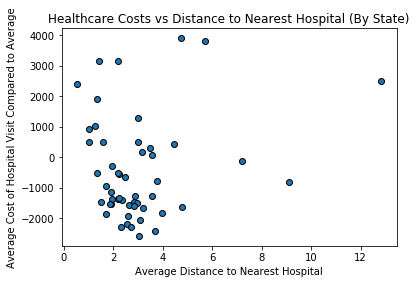

In [50]:
plt.scatter(merged["Hosp_Dist"], merged["Difference"], edgecolors="black")
plt.xlabel("Average Distance to Nearest Hospital")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Distance to Nearest Hospital (By State)")
plt.show
plt.savefig("Images/cost_vs_dist_state.png")

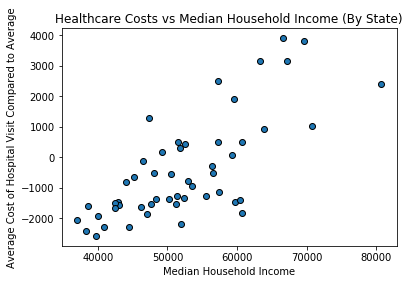

In [51]:
plt.scatter(merged["Household Income"], merged["Difference"], edgecolors="black")
plt.xlabel("Median Household Income")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Median Household Income (By State)")
plt.show
plt.savefig("Images/cost_vs_income_state.png")

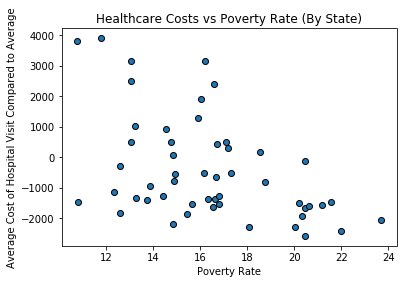

In [52]:
plt.scatter(merged["Pvty Rate"], merged["Difference"], edgecolors="black")
plt.xlabel("Poverty Rate")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Poverty Rate (By State)")
plt.show
plt.savefig("Images/cost_vs_pvty_state.png")

## Connor Visualization